# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from scipy.stats import expon

In [16]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [71]:
df.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


In [72]:
df.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [18]:
df.loc[(df.Latitude<=0), 'Hemisfério'] = 'Sul' 
df.loc[(df.Latitude>0), 'Hemisfério'] = 'Norte'
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [79]:
dfM=df.Magnitude
faixa = arange(5.5,8.2,0.1)

In [80]:
dfMcat = pd.cut(dfM, faixa, False)
print('Frequências relativas:')
ut1 = (dfMcat.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')

Frequências relativas:
[5.5, 5.6)    20.1
[5.6, 5.7)    17.0
[5.7, 5.8)    13.2
[5.8, 5.9)    10.1
[5.9, 6.0)     8.3
[6.0, 6.1)     6.8
[6.1, 6.2)     5.2
[6.2, 6.3)     3.9
[6.3, 6.4)     3.3
[6.4, 6.5)     2.5
[6.5, 6.6)     2.0
[6.6, 6.7)     1.6
[6.7, 6.8)     1.3
[6.8, 6.9)     1.0
[6.9, 7.0)     0.8
[7.0, 7.1)     0.7
[7.1, 7.2)     0.5
[7.2, 7.3)     0.4
[7.3, 7.4)     0.3
[7.4, 7.5)     0.3
[7.5, 7.6)     0.2
[7.6, 7.7)     0.2
[7.7, 7.8)     0.2
[7.8, 7.9)     0.1
[7.9, 8.0)     0.1
[8.0, 8.1)     0.1
Name: Magnitude, dtype: float64 



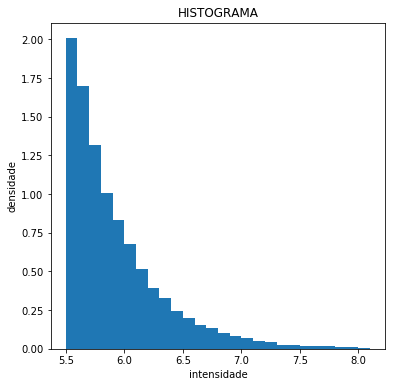

In [111]:
plot = dfM.plot.hist(bins=faixa,title='HISTOGRAMA',normed=1, figsize=(6, 6), alpha=1.0)
plt.xlabel('intensidade')
plt.ylabel('densidade')


Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [82]:
expon.fit(df["Magnitude"])

(5.4999999996710809, 0.38254864885090978)

Loc: Seria o x que começa o gráfico

Scale:seria 1/y no ponto onde partiria

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

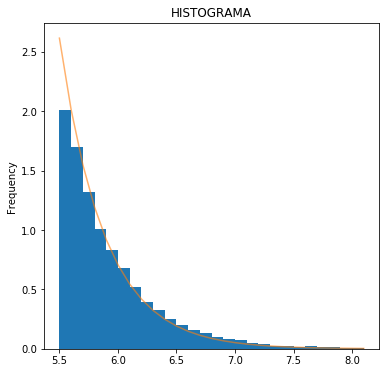

In [134]:
plot = dfM.plot.hist(bins=faixa,title='HISTOGRAMA',normed=1, figsize=(6, 6), alpha=1.0)
plt.plot(faixa,expon.pdf(faixa,loc = 5.4999999996710809, scale = 0.38254864885090978), alpha = 0.6)

#### Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [174]:
TipoM = pd.crosstab( df.Hemisfério, df.Type, margins=True, rownames=['Hemisfério'], colnames=['Tipo'], normalize=True)*100
TipoM = TipoM.round(decimals=2)
TipoM

Tipo,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,44.71,0.01,0.63,0.0,45.35
Sul,54.52,0.01,0.12,0.0,54.65
All,99.23,0.02,0.75,0.0,100.00


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [146]:
P = TipoM.Earthquake[0]
print("P = "+ str(P) +"%")

P = 44.71%


Explique o seu raciocínio

A probabilidade de ter um terremoto no hemisfério norte seria a probabilidade de ser um terremoto e no norte P(N∩E).


### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [94]:
#P(Ex|N) = P(Ex ∩ N)/P(N)
P = TipoM['Nuclear Explosion'][0]/TipoM['All'][0]
print("P = "+ str(P*100) +"%")

P = 1.38919514884%


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

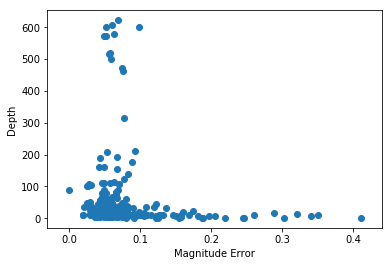

In [48]:
plt.scatter(df['Magnitude Error'], df.Depth)
plt.xlabel("Magnitude Error")
plt.ylabel("Depth")
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [16]:
df.Depth.corr(df['Magnitude Error'])

-0.076918438923387247

Explique o que significa o valor da correlação calculada acima? 

Quanto mais próximo de zero menor a liearidade entre elas, ou seja, maior dispersão e  menor sua correlação. Assim o gráfico de correlação, ou seja, sua linearidade teria uma ângulação de tangente negativa e por isso seu coeficinte é negativo.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

Longitude


count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

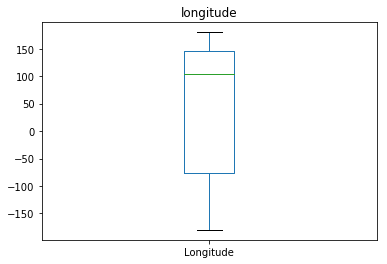

In [41]:
plot = df.Longitude.plot(kind='box',title='longitude')

print("Longitude")
df.Longitude.describe()


Latitude


count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

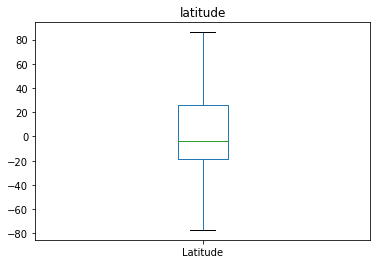

In [51]:
plot = df.Latitude.plot(kind='box',title='latitude')

print("Latitude")
df.Latitude.describe()

Analizando ambos os dados (Longitude e Latitude), percebe-se que aqueles que estão entre [0, -20°S] e [100°, 150° L] eram aqueles que tinham maior probabilidade de acontecer desastres.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 

**- Considerando que Magnitude Type e Type  são independentes: **

** 1) Pnorte = P(N|MB∩Ex) **

** 2) Psul = P(S|MB∩Ex)  **

** Como foi provado abaixo a probabilidade de ocorrer um Type Explosion ou Magnitude Type tem maior probabilidade de ocorrer no sul!** 

In [183]:
TipoM2 = pd.crosstab([df.Type, df['Magnitude Type']], df.Hemisfério,  margins=True)
TipoM2 = TipoM2.round(decimals=2)
TipoM2

Hemisfério                        Norte    Sul    All
Type              Magnitude Type                     
Earthquake        MB               1547   2047   3594
                  MD                  6      0      6
                  MH                  5      0      5
                  ML                 65      0     65
                  MS                766    936   1702
                  MW               3684   4038   7722
                  MWB              1112   1346   2458
                  MWC              2389   3279   5668
                  MWR                12     14     26
                  MWW               879   1104   1983
Explosion         MB                  2      2      4
Nuclear Explosion MB                135     28    163
                  ML                 12      0     12
Rock Burst        MWC                 0      1      1
All                               10614  12795  23409

In [186]:
Pnorte = (TipoM2['Norte'][11]/TipoM2['All'][11])
print("Pnorte = "+ str(Pnorte*100) +"%")

Psul = (TipoM2['Sul'][11]/TipoM2['All'][11])
print("Psul = "+ str(Psul*100) +"%")


Pnorte = 82.8220858896%
Psul = 17.1779141104%
